In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [4]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                0.3: "Non-IID partition (α=0.3)", 
                                                })
    # sk = [0, 0.1, 0.01, 0.001]
    # data_temp = data_temp.set_index('Scaling').loc[sk].reset_index()
    # print(data_temp.size)
    return data_temp

In [64]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        
        if "FCs" in path: 
            if "FCs0.1E1w1_Mean5" in path: 
                data["Mode"] += " (FCs0.1E1)"
                pass
            else:
                continue
        
        if "Mean1" in path:
            data["Mode"] += "+M1"
            continue
        elif "Mean2" in path:
            data["Mode"] += "+M2"
            continue
        elif "Mean5" in path:
            data["Mode"] += "+M5"
            continue
        else:
            # continue
            pass
        
        if "G11" in path and "LR1.2" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.2)"
        elif "G11" in path and "LR1.5" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.5)"
        elif "G11" in path and "LR1.0" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.0)"
        elif "G11" in path and "LR0.8" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.8)"
        elif "G11" in path and "LR0.6" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.6)"
        elif "G11" in path and "LR0.3" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.3)"
        elif "G11" in path: continue

        if "gs11" in path: continue
            # data["Mode"] += "+gs11"
            # continue
        elif "gs12" in path: 
            continue
        elif "gs21" in path: continue
        elif "gs22" in path: continue
        elif "gs31" in path: 
            data["Mode"] += "+gs31"
            continue
            # continue
        elif "gs32" in path: 
            data["Mode"] += "+gs32"
            continue
        elif "gs411" in path: 
            data["Scaling"] = "x 0.01"
            # continue
        elif "gs4122" in path: 
            data["Scaling"] = "x 0.001 (4122)"
        elif "gs4123" in path: 
            data["Scaling"] = "x 0.001 (4123)"
        elif "gs412" in path: 
            data["Scaling"] = "x 0.001"
        elif "gs414" in path: 
            data["Scaling"] = "x 0.001 (x1.5)"
            continue
        elif "gs41" in path: 
            data["Scaling"] = "x 0.1"
            # continue
        elif "gs421" in path: 
            data["Mode"] += "+gs421"
            continue
        elif "gs431" in path: 
            data["Scaling"] += "+gs431"
            # continue
        elif "gs432" in path: 
            data["Scaling"] += "+gs432"
            # continue
        elif "gs41" in path: 
            data["Mode"] += "+gs41"
            # continue
        elif "gs42" in path: 
            data["Mode"] += "+gs42"
            continue
        elif "gs711" in path: 
            data["Scaling"] += "+gs711"
            continue
        elif "gs712" in path: 
            data["Scaling"] += "+gs712"
            continue
        elif "gs713" in path: 
            data["Scaling"] += "+gs713"
            continue
        elif "gs715" in path: 
            data["Scaling"] += "+gs715"
            continue
        elif "gs716" in path: 
            data["Scaling"] += "+gs716"
            continue
        elif "gs717" in path: 
            data["Scaling"] += "+gs717"
            continue
        elif "gs714" in path: 
            # data["Scaling"] += "+gs714"
            continue
        elif "gs811" in path: 
            data["Scaling"] += "+gs811"
            continue
        elif "gs821" in path: 
            data["Scaling"] += "+gs821"
            continue
        elif "gs" in path:
            continue
        # elif "gs61L0.01L0.1" in path: 
        #     data["Scaling"] = "gs61L0.01L0.1"
        # elif "gs61L0.01L0.01" in path: 
        #     data["Scaling"] = "gs61L0.01L0.01"
        # elif "gs61L0.01L0.001" in path: 
        #     data["Scaling"] = "gs61L0.01L0.001"

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

Text(0.5, 0, '# communications')

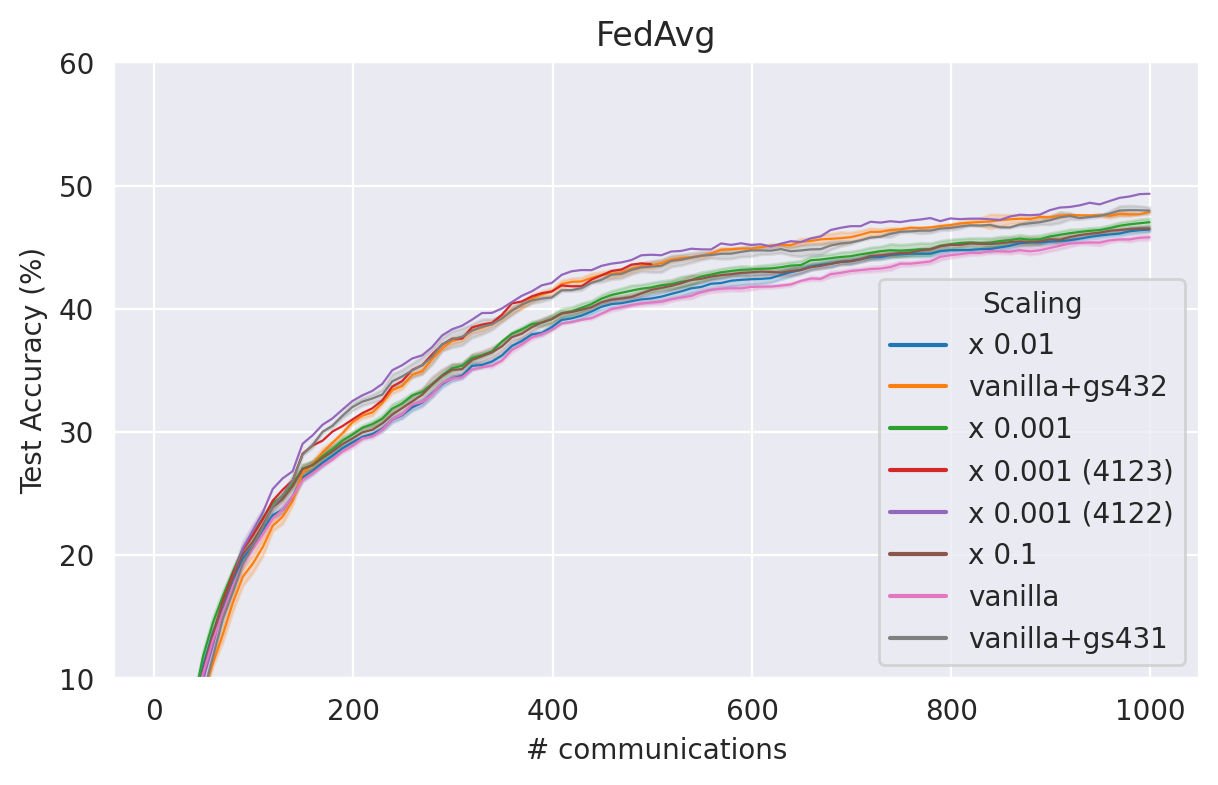

In [69]:
data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

fig, axes = plt.subplots(1, 1, figsize=(7,4), dpi=200, sharey=True)
sns.set_style("darkgrid")
ap = 0.01

ax = axes
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 999]
temp = temp[(temp["Distribution"] == "IID partition")]
temp = temp[(temp["Mode"] == "fedavg")]
# temp = temp[(temp["Mode"] == "feddyn")]
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
ax.set_ylim([10,60])
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedAvg")
ax.set_xlabel("# communications")

Text(0.5, 0, '# communications')

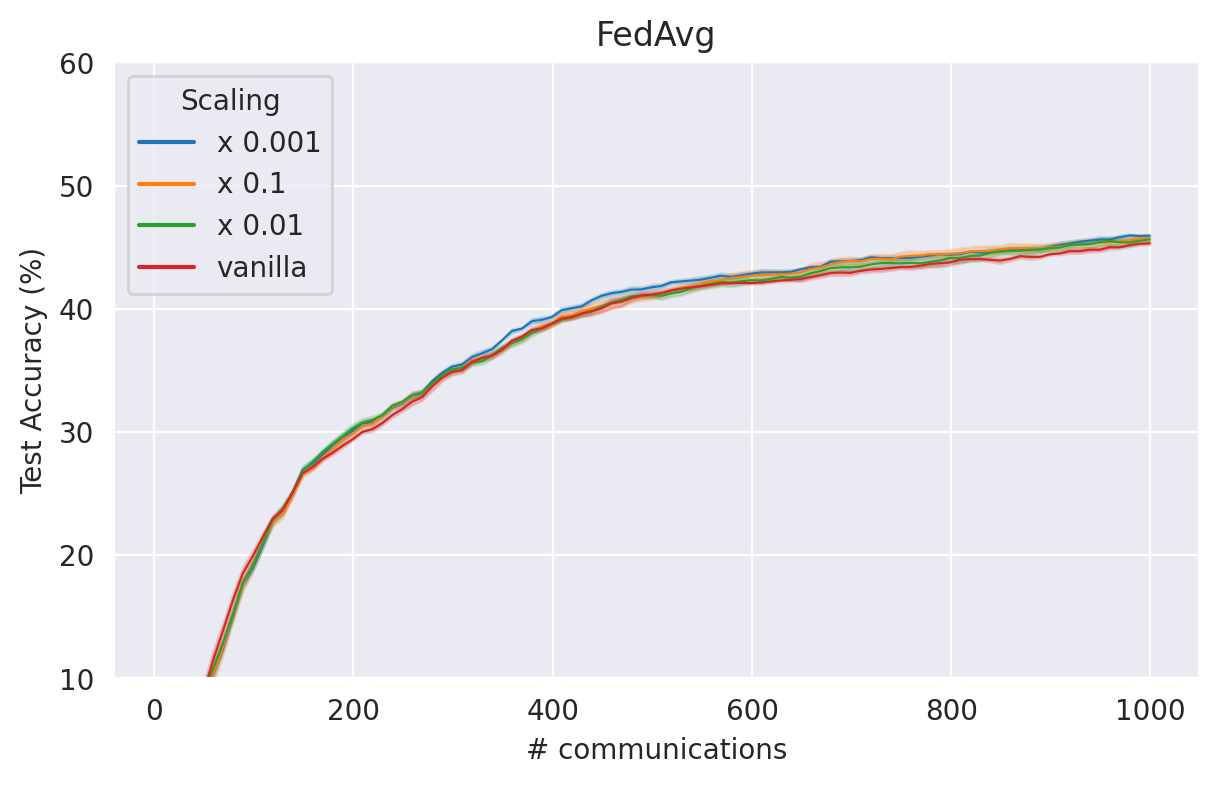

In [38]:
data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

fig, axes = plt.subplots(1, 1, figsize=(7,4), dpi=200, sharey=True)
sns.set_style("darkgrid")
ap = 0.01

ax = axes
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 999]
temp = temp[(temp["Distribution"] != "IID partition")]
temp = temp[(temp["Mode"] == "fedavg")]
# temp = temp[(temp["Mode"] == "feddyn")]
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
ax.set_ylim([10,60])
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedAvg")
ax.set_xlabel("# communications")

In [9]:
tempa


NameError: name 'tempa' is not defined

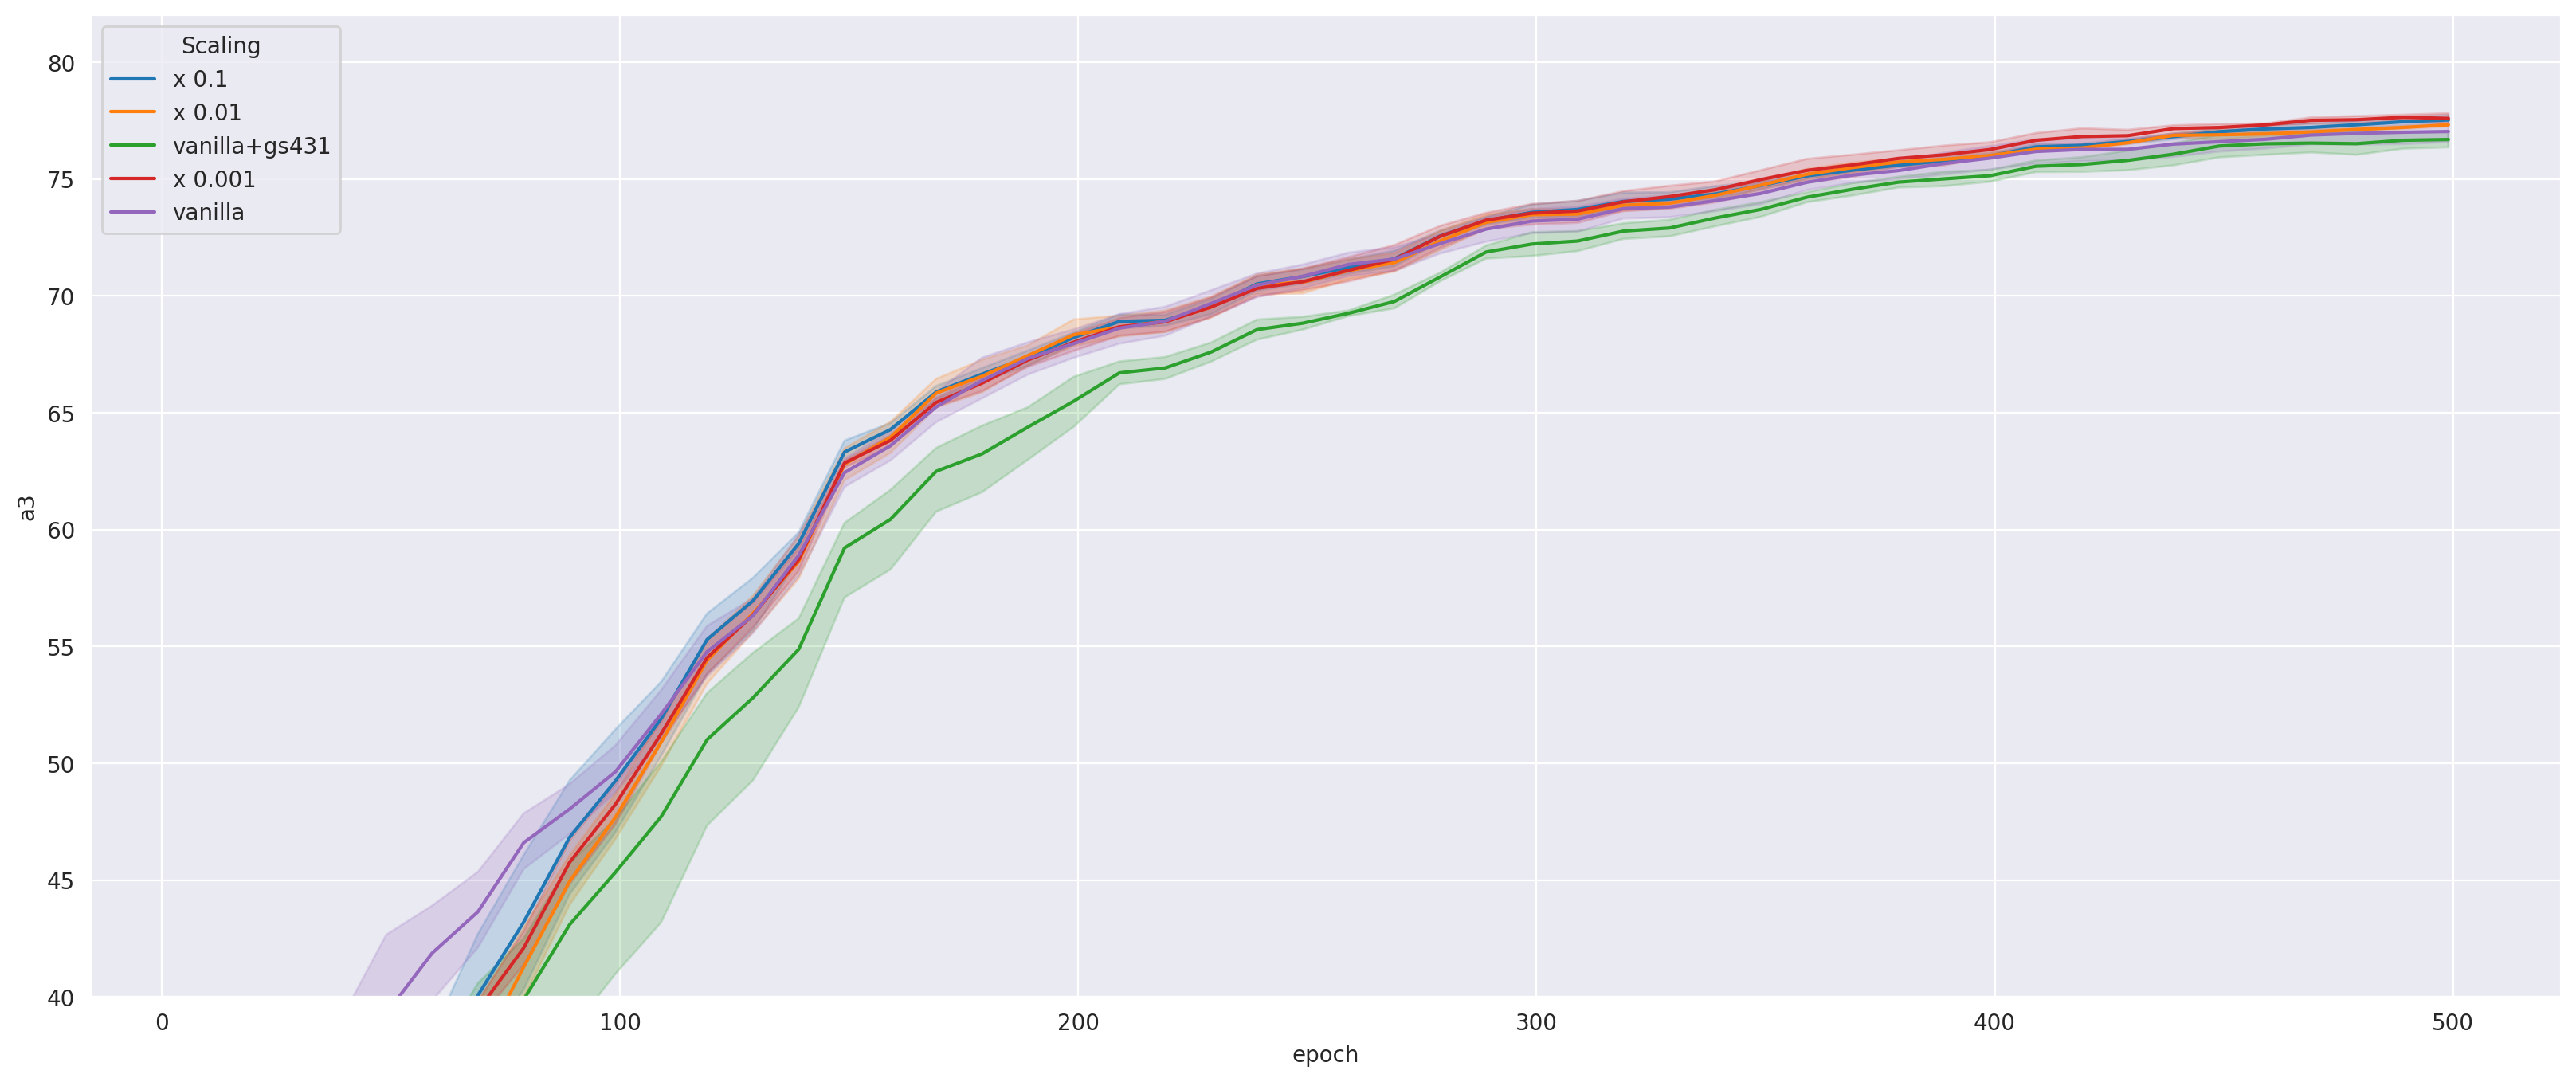

In [47]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] <= 499]
    temp = temp[temp["Mode"] == "fedavg"]
    temp = temp[(temp["Distribution"] != "IID partition")]
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax)
    ax.set_ylim([40,82])

Scaling,1.000,0.100,0.010,0.001
Mode,,,,
fedavg,NaN,NaN,NaN,NaN
feddyn,NaN,NaN,NaN,NaN
fedprox,NaN,NaN,NaN,NaN
scaffold,NaN,NaN,NaN,NaN


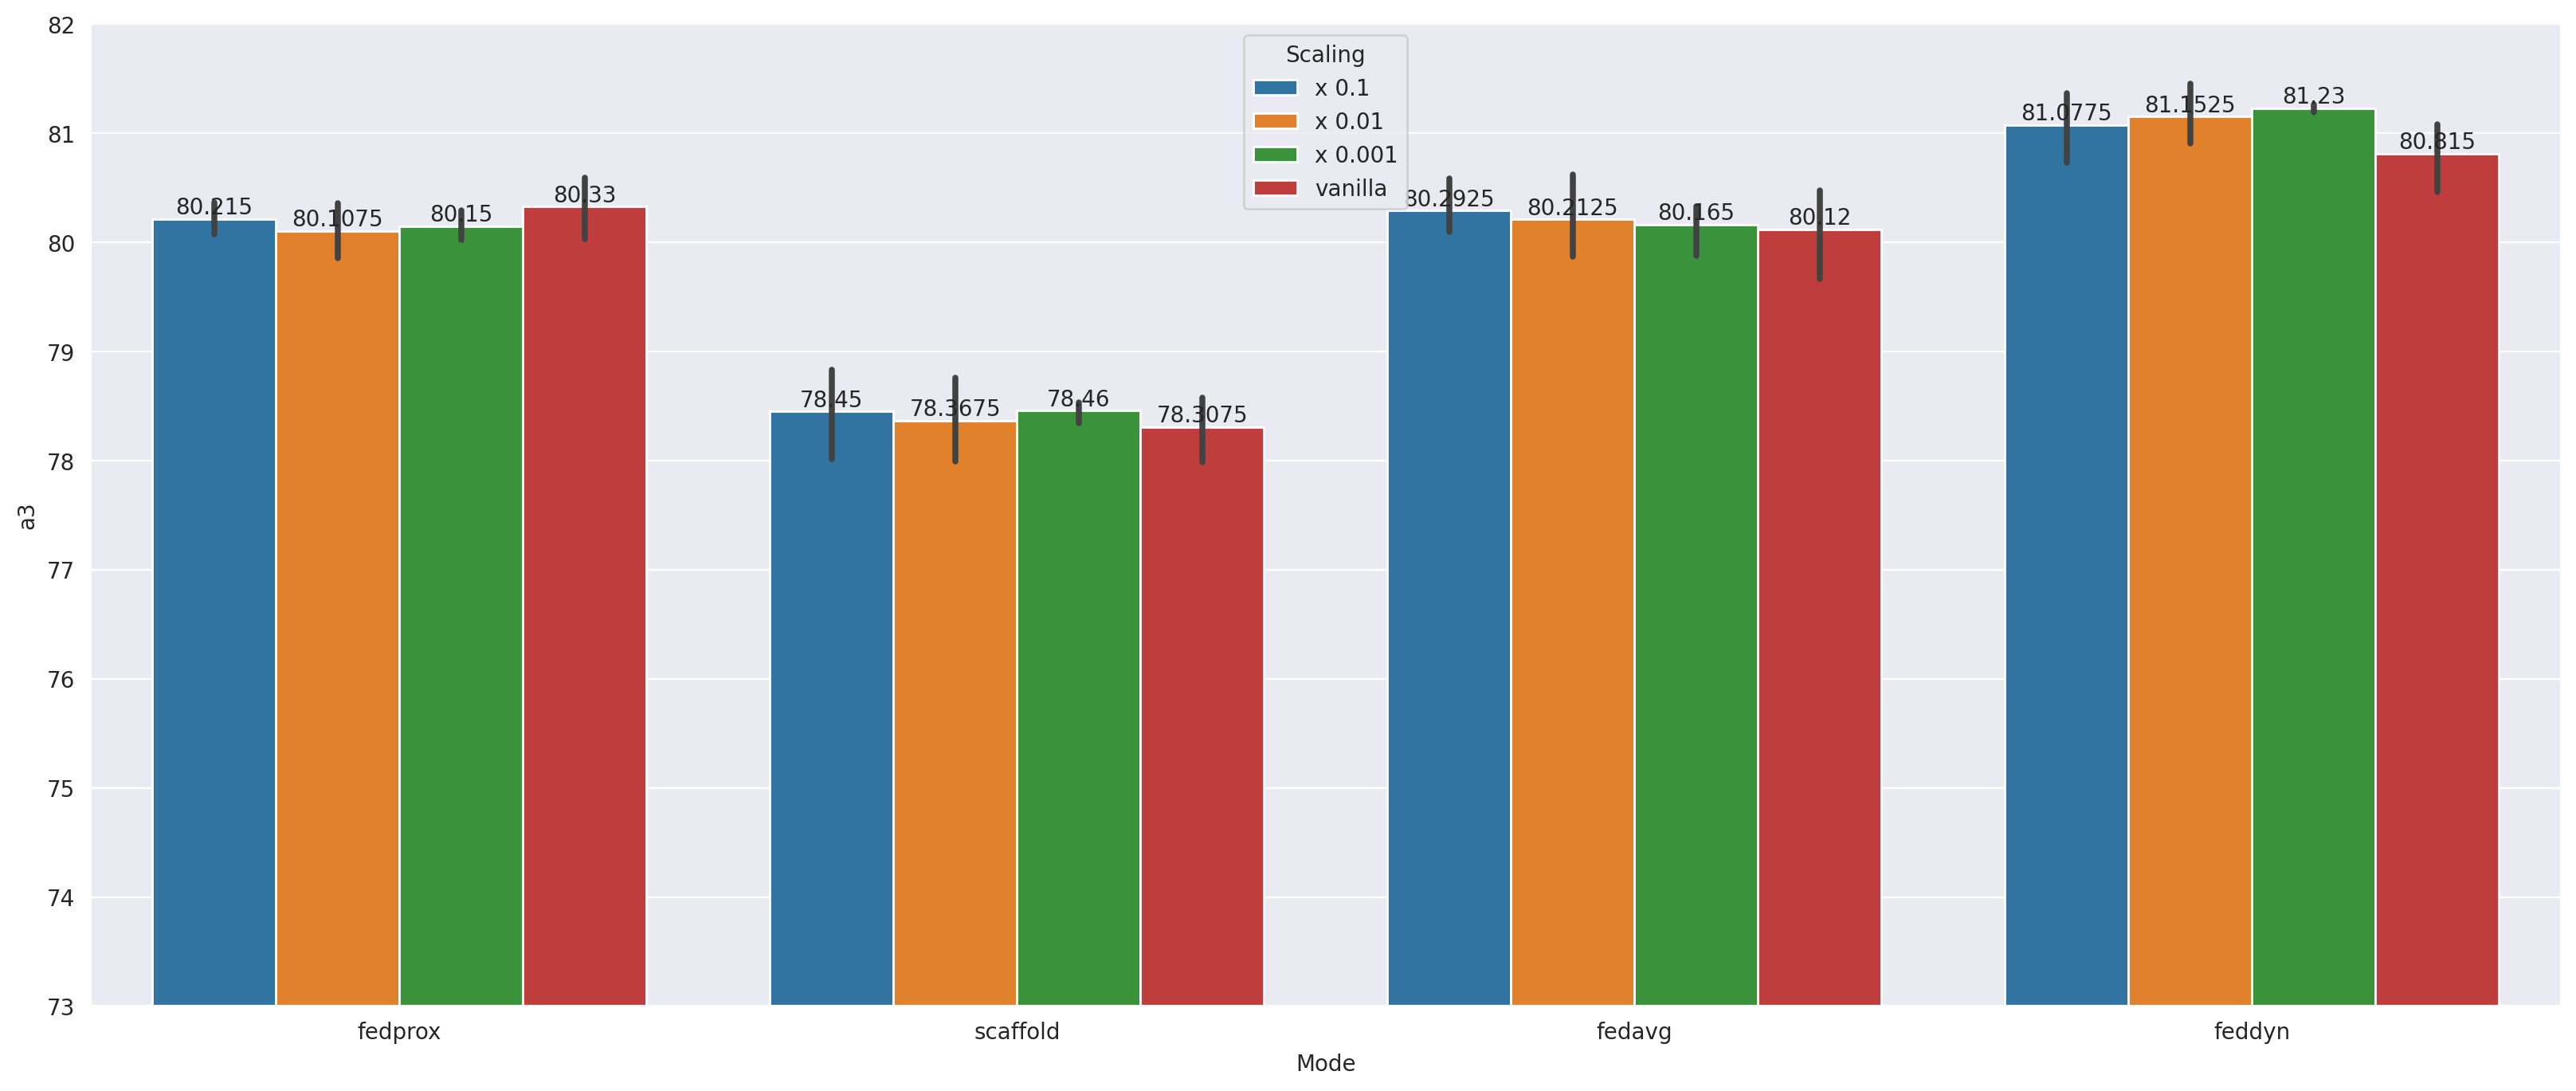

In [23]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 499]
    temp = temp[(temp["Distribution"] == "IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="Scaling", ax=ax)
    ax.set_ylim([73,82])
    for i in range(4):
        ax.bar_label(ax.containers[i])

tempa = copy.deepcopy(temp)
tempa = tempa.pivot_table(index='Mode', columns='Scaling', values='a3', aggfunc='mean')
tempa.reindex([1, 0.1, 0.01, 0.001], axis=1)
# tempa.reindex(["fedavg", "fedprox", "scaffold", "feddyn"], axis=0)

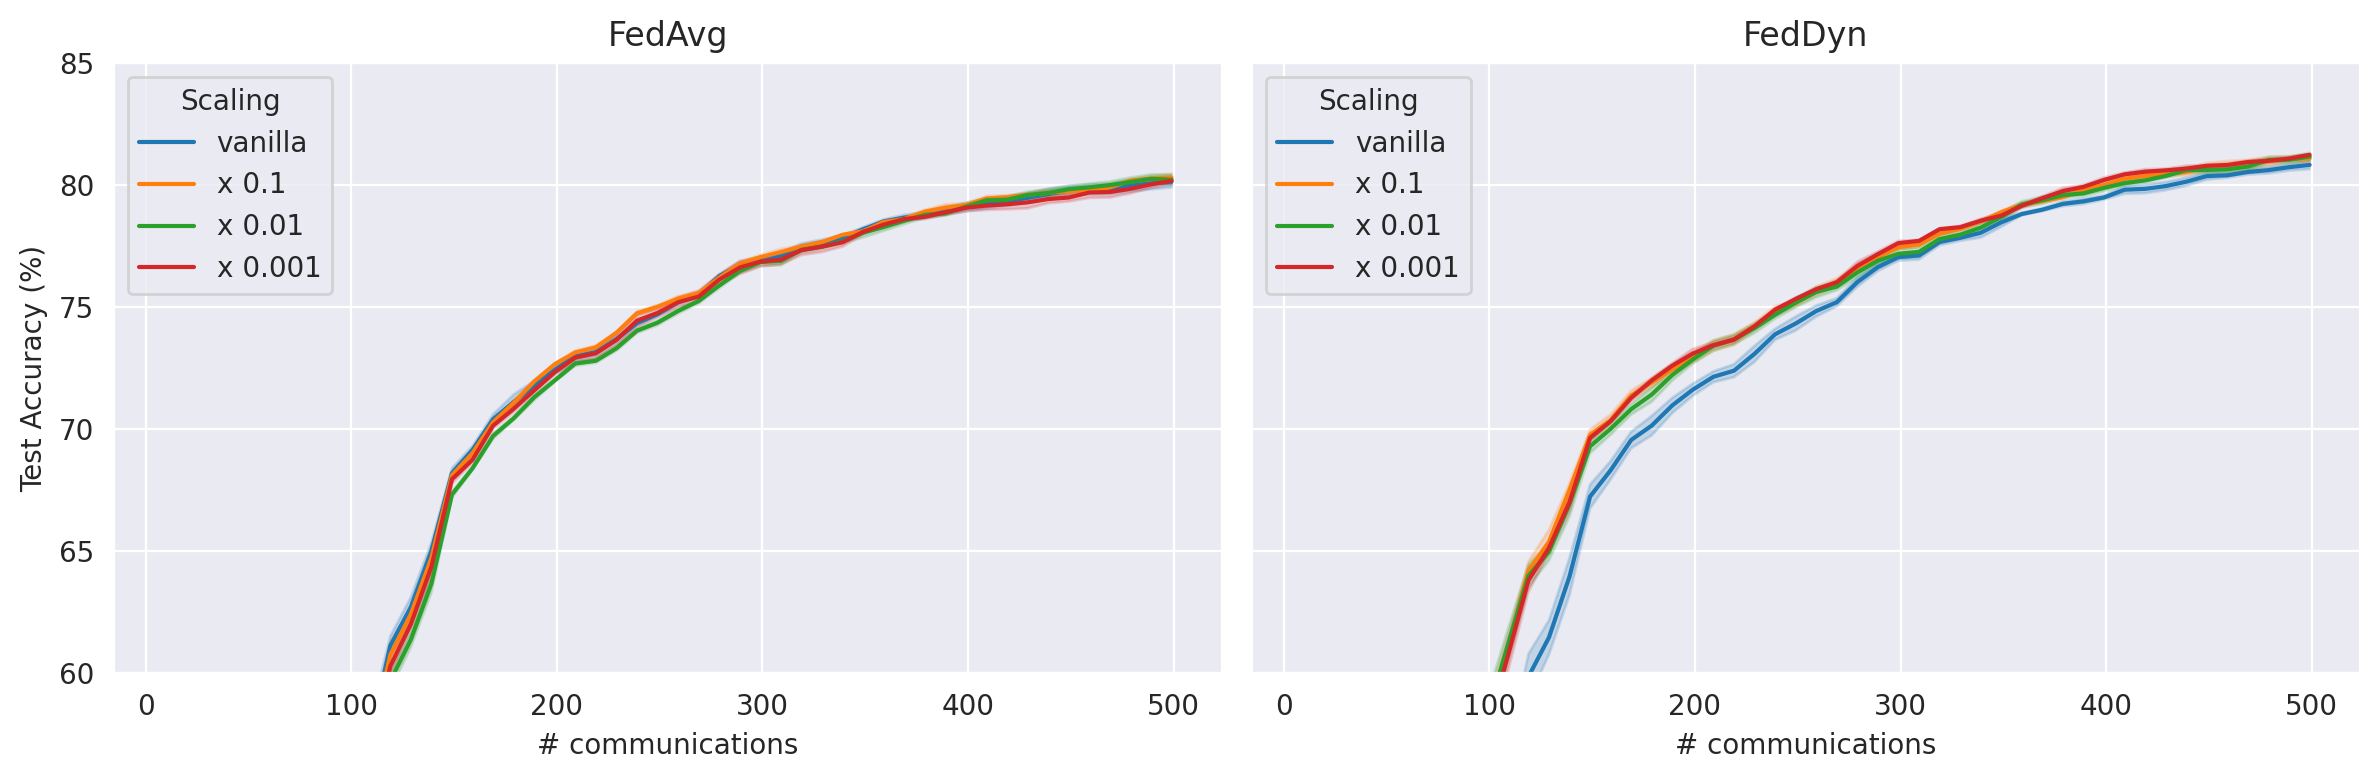

In [ ]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=200, sharey=True)
sns.set_style("darkgrid")
ap = 0.01

ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Distribution"] == "IID partition")]
temp = temp[(temp["Mode"] == "fedavg")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedAvg")
ax.set_xlabel("# communications")

ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Distribution"] == "IID partition")]
temp = temp[(temp["Mode"] == "feddyn")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedDyn")
ax.set_xlabel("# communications")
ax.set_ylim([60,85])

# ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
fig.tight_layout()

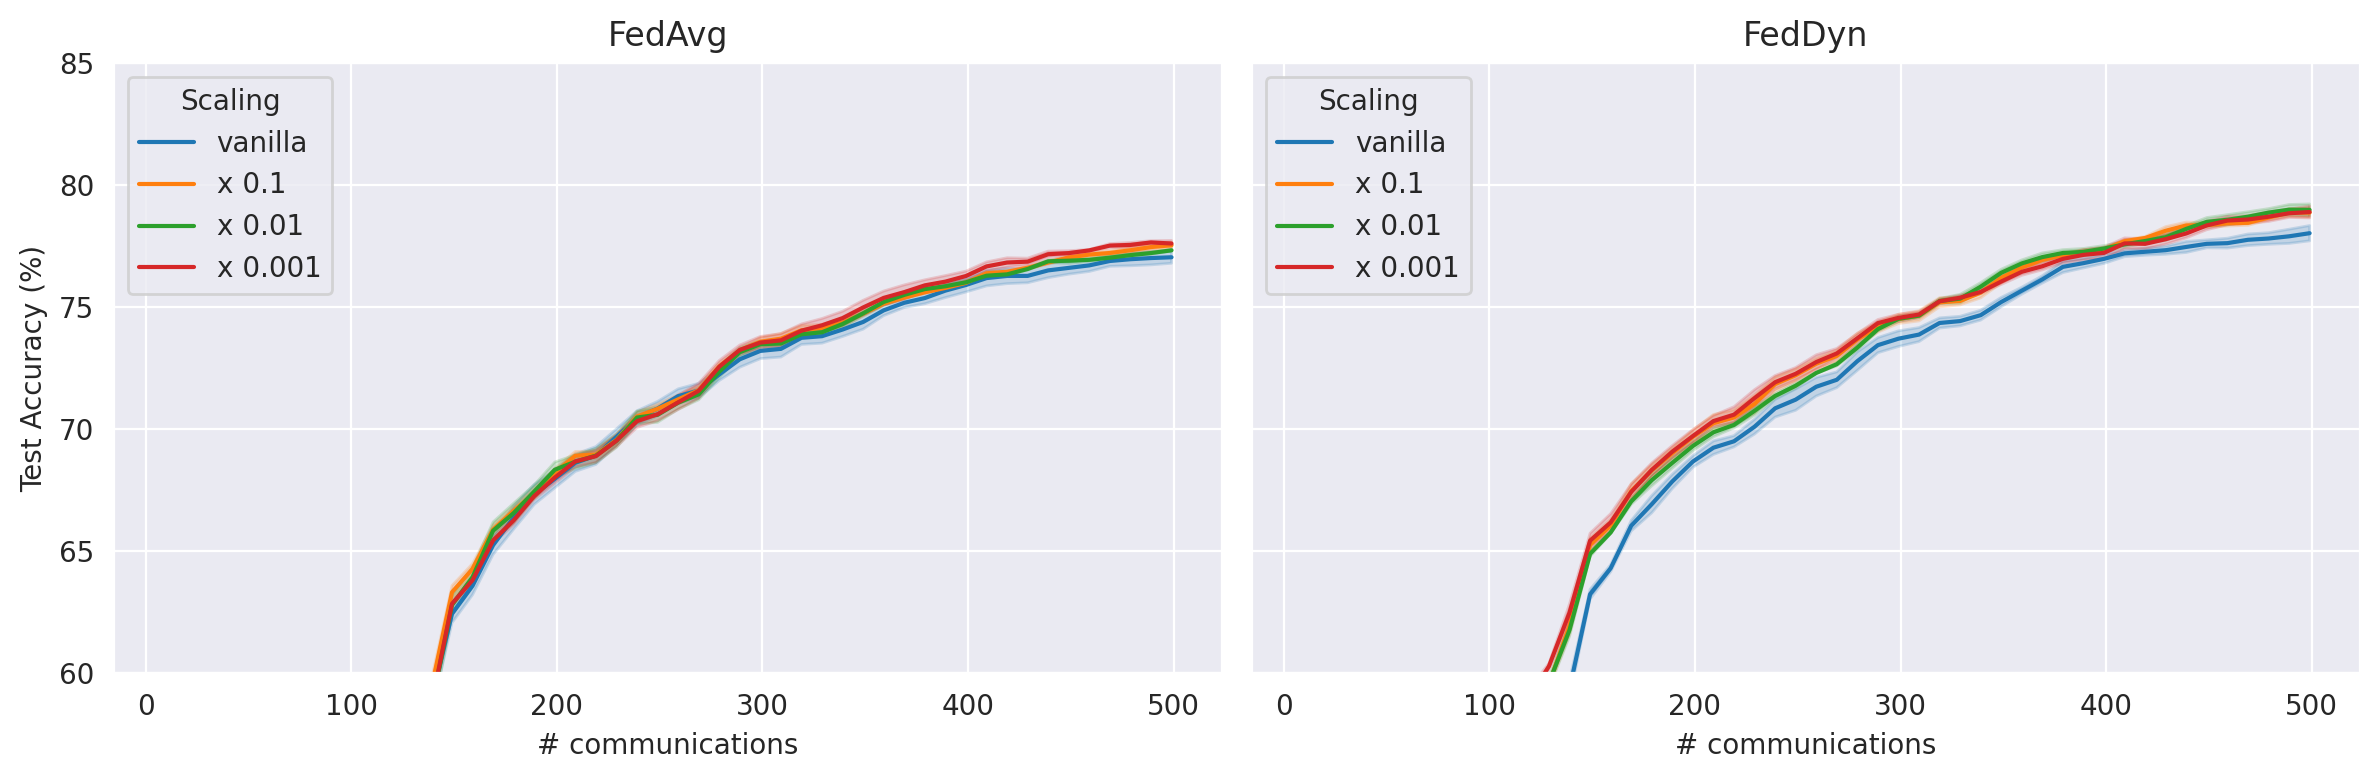

In [ ]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 2, figsize=(12,4), dpi=200, sharey=True)
sns.set_style("darkgrid")
ap = 0.01

ax = axes[0]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Distribution"] != "IID partition")]
temp = temp[(temp["Mode"] == "fedavg")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedAvg")
ax.set_xlabel("# communications")

ax = axes[1]
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == ap]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Distribution"] != "IID partition")]
temp = temp[(temp["Mode"] == "feddyn")]
sk = ["vanilla", "x 0.1", "x 0.01", "x 0.001"]
temp = temp.set_index('Scaling').loc[sk].reset_index()
ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Scaling", ax=ax, palette="tab10", errorbar="se")
ax.set_ylabel("Test Accuracy (%)")
ax.set_title("FedDyn")
ax.set_xlabel("# communications")
ax.set_ylim([60,85])

# ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
fig.tight_layout()